In [2]:
import logging
import time

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

import tensorflow_text

In [9]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [ ]:
1536 * 16

In [231]:
from tensorflow.keras.layers import MultiHeadAttention
import tensorflow as tf

inputs = tf.keras.Input(shape=[16, 1536])
mh = MultiHeadAttention(num_heads=5, key_dim=5, attention_axes=(2))(inputs, inputs)
mhn = tf.keras.layers.LayerNormalization()(mh)

d1 = tf.keras.layers.Dense(5092, activation='relu')(inputs)
d3 = tf.keras.layers.Dropout(0.3)(l0)
d2 = tf.keras.layers.Dense(1536, activation='relu')(d1)
d3 = tf.keras.layers.Dropout(0.3)(d2)

add = tf.keras.layers.Add()([d3, mhn])

l1 = tf.keras.layers.LayerNormalization()(add)
f = tf.keras.layers.Flatten()(l1)
d4 = tf.keras.layers.Dense(1024, activation='relu')(f)
output = tf.keras.layers.Dense(16, activation='softmax')(d4)
model = tf.keras.Model(inputs=inputs, outputs=output)

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

Model: "model_42"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_76 (InputLayer)       [(None, 16, 1536)]           0         []                            
                                                                                                  
 dense_169 (Dense)           (None, 16, 5092)             7826404   ['input_76[0][0]']            
                                                                                                  
 dense_170 (Dense)           (None, 16, 1536)             7822848   ['dense_169[0][0]']           
                                                                                                  
 multi_head_attention_57 (M  (None, 16, 1536)             155211    ['input_76[0][0]',            
 ultiHeadAttention)                                                  'input_76[0][0]']     

In [232]:
model.fit(X_train, y_train,
            epochs=100,
            batch_size=64, 
            validation_split=0.2)

Epoch 1/100
46/46 [==============================] - 2s 14ms/step - loss: 4.9840 - accuracy: 0.3034 - val_loss: 2.6389 - val_accuracy: 0.3505
Epoch 2/100
46/46 [==============================] - 0s 9ms/step - loss: 2.6498 - accuracy: 0.3378 - val_loss: 2.5959 - val_accuracy: 0.3505
Epoch 3/100
46/46 [==============================] - 0s 9ms/step - loss: 2.6081 - accuracy: 0.3378 - val_loss: 2.5556 - val_accuracy: 0.3505
Epoch 4/100
46/46 [==============================] - 0s 9ms/step - loss: 2.5693 - accuracy: 0.3378 - val_loss: 2.5183 - val_accuracy: 0.3505
Epoch 5/100
46/46 [==============================] - 0s 10ms/step - loss: 2.5333 - accuracy: 0.3378 - val_loss: 2.4837 - val_accuracy: 0.3505
Epoch 6/100
46/46 [==============================] - 0s 10ms/step - loss: 2.5001 - accuracy: 0.3378 - val_loss: 2.4520 - val_accuracy: 0.3505
Epoch 7/100
46/46 [==============================] - 0s 10ms/step - loss: 2.4698 - accuracy: 0.3378 - val_loss: 2.4231 - val_accuracy: 0.3505
Epoch 8/1

In [233]:
model.evaluate(X_test, y_test)

29/29 [==============================] - 0s 2ms/step - loss: 2.2466 - accuracy: 0.2859


[2.2466201782226562, 0.2858695685863495]

In [234]:
pred = model.predict(X_test)

29/29 [==============================] - 0s 1ms/step


In [238]:
np.argmax(pred[4])

1

In [ ]:
# Generative modele


from tensorflow.keras.layers import MultiHeadAttention
import tensorflow as tf


optimizer = tf.keras.optimizers.Adam(0.01, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)

input_tensor = tf.keras.Input(shape=[16, 1536])
layer = MultiHeadAttention(num_heads=5, key_dim=5, attention_axes=(1, 2))
x = layer(input_tensor, input_tensor)
layer_norm = tf.keras.layers.LayerNormalization()
x = layer_norm(x)

d_model = 1536

seq = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(d_model, activation='relu'),
    tf.keras.layers.Dropout(0.1)])

add = tf.keras.layers.Add()
x = add([x, seq(x)])
layer_norm = tf.keras.layers.LayerNormalization()
x = layer_norm(x)

x = tf.keras.layers.Flatten()(x)
final = tf.keras.layers.Dense(1536, activation='tanh')(x)

model = tf.keras.Model(inputs=input_tensor, outputs=final)
model.compile(loss='cosine_similarity', optimizer='adam', metrics=['cosine_similarity'])

model.summary()

model.fit(X_train, y_train,
            epochs=1000,
            batch_size=64, 
            validation_split=0.2)

In [145]:
model.summary()

Model: "model_22"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_54 (InputLayer)       [(None, 16, 128)]            0         []                            
                                                                                                  
 multi_head_attention_42 (M  (None, 16, 128)              4763      ['input_54[0][0]',            
 ultiHeadAttention)                                                  'input_54[0][0]']            
                                                                                                  
 layer_normalization_38 (La  (None, 16, 128)              256       ['multi_head_attention_42[0][0
 yerNormalization)                                                  ]']                           
                                                                                           

In [180]:
from sklearn.metrics.pairwise import cosine_similarity

tp = 0
fp = 0


pred = model.predict(X_test)

for i in range(100):
    p = np.argmax(cosine_similarity(X_test[i], [pred[i]])) == np.argmax(cosine_similarity(X_test[i], [y_test[i]]))
    if p:
        tp += 1
    fp += 1

print(tp/fp)

  1/111 [..............................] - ETA: 1s

111/111 [==============================] - 0s 2ms/step
0.32


In [3]:
import pandas as pd
import numpy as np
import pickle as pkl

import sys
sys.path.append('../')
from utils import *


df = pd.read_pickle('../../data/datasets/raw-video-level-watches')
videos = pd.read_pickle('../../data/videos_raw_metadata')
title_embeddings = pd.read_pickle('../../data/embeddings/openai-title')

In [188]:
playing = watch['playing']

In [190]:
np.array(title_embeddings[videos[playing]['snippet']['title']])

array([-0.01953424, -0.01826318,  0.0135201 , ...,  0.00290338,
       -0.00709789,  0.00755279])

In [207]:
# Categorical


X = []
Y = []
for watch in tqdm(df):
    playing = watch['playing']
    selected = watch['selected']
    if playing not in videos or selected not in videos or any([s not in videos for s in watch['upnext']]):
        continue

    if len(watch['upnext']) < 15:
        continue
        
    upnext = watch['upnext'][:15]

    playing = watch['playing']
    playing = np.array(title_embeddings[videos[playing]['snippet']['title']])
    all_suggested = [np.array(title_embeddings[videos[s]['snippet']['title']]) for s in upnext]

    selected = watch['selected']
    y = [0]
    for s in upnext:
        if s == selected:
            y.append(1)
        else:
            y.append(0)

    x = np.vstack([playing, all_suggested])
    X.append(x)
    Y.append(y)

  0%|          | 0/8563 [00:00<?, ?it/s]

In [208]:
X = np.array(X)
Y = np.array(Y)

In [209]:
Y.shape

(4599, 16)

In [194]:
X.shape

(4599, 16, 1536)

In [201]:
# generative


X = []
Y = []
for watch in tqdm(df):
    playing = watch['playing']
    selected = watch['selected']
    if playing not in videos or selected not in videos or any([s not in videos for s in watch['upnext']]):
        continue

    if len(watch['upnext']) < 15:
        continue
        
    upnext = watch['upnext'][:15]

    playing = watch['playing']
    playing = np.array(title_embeddings[videos[playing]['snippet']['title']])
    all_suggested = [np.array(title_embeddings[videos[s]['snippet']['title']]) for s in upnext]

    selected = watch['selected']
    y = []
    for s in upnext:
        if s == selected:
            y = np.array(title_embeddings[videos[selected]['snippet']['title']])

    if len(y) == 0:
        continue

    x = np.vstack([playing, all_suggested])
    X.append(x)
    Y.append(y)

  0%|          | 0/8563 [00:00<?, ?it/s]

In [202]:
X = np.array(X)
Y = np.array(Y)
X.shape

(4413, 16, 1536)

In [239]:
# generative seperate

pX = []
sX = []
Y = []
for watch in tqdm(df):
    playing = watch['playing']
    selected = watch['selected']
    if playing not in videos or selected not in videos or any([s not in videos for s in watch['upnext']]):
        continue

    if len(watch['upnext']) < 15:
        continue
        
    upnext = watch['upnext'][:15]

    playing = watch['playing']
    playing = np.array(title_embeddings[videos[playing]['snippet']['title']])
    all_suggested = [np.array(title_embeddings[videos[s]['snippet']['title']]) for s in upnext]

    selected = watch['selected']
    y = []
    for s in upnext:
        if s == selected:
            y = np.array(title_embeddings[videos[selected]['snippet']['title']])

    if len(y) == 0:
        continue

    pX.append(playing)
    sX.append(all_suggested)
    Y.append(y)

  0%|          | 0/8563 [00:00<?, ?it/s]

In [240]:
sX = np.array(sX)
pX = np.array(pX)

(4413, 15, 1536)

In [290]:
pX.shape

(4413, 1, 1536)

In [6]:
# generative seperate

pX = []
sX = []
isX = []
Y = []
for watch in tqdm(df):
    playing = watch['playing']
    selected = watch['selected']
    if playing not in videos or selected not in videos or any([s not in videos for s in watch['upnext']]):
        continue

    if len(watch['upnext']) < 15:
        continue
        
    upnext = watch['upnext'][:15]

    playing = watch['playing']
    playing = np.array(title_embeddings[videos[playing]['snippet']['title']])
    all_suggested = [np.array(title_embeddings[videos[s]['snippet']['title']]) for s in upnext]

    selected = watch['selected']
    y = []
    for s in upnext:
        if s == selected:
            y = 1
        else:
            y = 0

        s = np.array(title_embeddings[videos[s]['snippet']['title']])

        pX.append(playing)
        sX.append(all_suggested)
        isX.append(s)
        Y.append(y)

  0%|          | 0/8563 [00:00<?, ?it/s]

In [7]:
Y = np.array(Y)
pX = np.array(pX)
pX = pX.reshape(pX.shape[0], 1, pX.shape[1])
isX = np.array(isX)
isX = isX.reshape(isX.shape[0], 1, isX.shape[1])
sX = np.array(sX)

In [10]:
pX_train, pX_test, isX_train, isX_test, sX_train, sX_test, y_train, y_test = train_test_split(pX, isX, sX, Y, test_size=0.2, random_state=42)

In [11]:

pX_train.shape, pX_test.shape, isX_train.shape, isX_test.shape, sX_train.shape, sX_test.shape, y_train.shape, y_test.shape

((55188, 1, 1536),
 (13797, 1, 1536),
 (55188, 1, 1536),
 (13797, 1, 1536),
 (55188, 15, 1536),
 (13797, 15, 1536),
 (55188,),
 (13797,))

In [28]:
merged.shape

TensorShape([None, 1920])

102.4

In [34]:
# binary separate inputs

from tensorflow.keras.layers import MultiHeadAttention
import tensorflow as tf


suggested_tensor = tf.keras.Input(shape=[15, 1536])
playing_tensor = tf.keras.Input(shape=[1, 1536])
# layer = MultiHeadAttention(num_heads=15, key_dim=15, attention_axes=(1), name='attention')
# # x = layer(playing_tensor, suggested_tensor)
# x = layer(suggested_tensor, playing_tensor)
# x = layer(suggested_tensor, suggested_tensor)
# layer_norm = tf.keras.layers.LayerNormalization()
# x = layer_norm(x)

st_dense = tf.keras.layers.Dense(512, activation='relu')(suggested_tensor)
st_dense = tf.keras.layers.Dense(64, activation='relu')(st_dense)
st = tf.keras.layers.Flatten()(st_dense)

pt = tf.keras.layers.Dense(960, activation='relu')(playing_tensor)
pt = tf.keras.layers.Flatten()(pt)

merged = tf.keras.layers.Concatenate()([st, pt])
mem = tf.keras.layers.Dense(512, activation='relu')(merged)

is_tensor = tf.keras.Input(shape=[1, 1536])
is_t = tf.keras.layers.Flatten()(is_tensor)
is_t = tf.keras.layers.Dense(512, activation='relu')(is_t)

merged = tf.keras.layers.Concatenate()([mem, is_t])

x = tf.keras.layers.Flatten()(merged)
x = tf.keras.layers.Dense(512, activation='relu')(x)
final = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=[suggested_tensor, playing_tensor, is_tensor], outputs=final)

from tensorflow import keras

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='acc'),
      keras.metrics.Precision(name='P'),
      keras.metrics.Recall(name='R'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)

model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_31 (InputLayer)       [(None, 15, 1536)]           0         []                            
                                                                                                  
 dense_47 (Dense)            (None, 15, 512)              786944    ['input_31[0][0]']            
                                                                                                  
 input_32 (InputLayer)       [(None, 1, 1536)]            0         []                            
                                                                                                  
 dense_48 (Dense)            (None, 15, 64)               32832     ['dense_47[0][0]']            
                                                                                            

In [35]:
pos = Y.sum()
neg = len(Y) - pos
total = neg + pos
w0 = (1 / neg) * (total / 2.0)
w1 = (1 / pos) * (total / 2.0)
class_weights = {0:w0, 1:w1}
class_weights

{0: 0.534742570113018, 1: 7.69578313253012}

In [36]:
model.fit([sX_train, pX_train, isX_train], y_train, epochs=1000, batch_size=64, validation_split=0.1, class_weight=class_weights)

Epoch 1/1000
777/777 [==============================] - 10s 10ms/step - loss: 0.6955 - tp: 1796.0000 - fp: 25627.0000 - tn: 20798.0000 - fn: 1448.0000 - acc: 0.4549 - P: 0.0655 - R: 0.5536 - auc: 0.5015 - prc: 0.0657 - val_loss: 0.6928 - val_tp: 207.0000 - val_fp: 2842.0000 - val_tn: 2333.0000 - val_fn: 137.0000 - val_acc: 0.4602 - val_P: 0.0679 - val_R: 0.6017 - val_auc: 0.5296 - val_prc: 0.0702
Epoch 2/1000
777/777 [==============================] - 7s 8ms/step - loss: 0.6933 - tp: 1732.0000 - fp: 22246.0000 - tn: 24179.0000 - fn: 1512.0000 - acc: 0.5217 - P: 0.0722 - R: 0.5339 - auc: 0.5369 - prc: 0.0728 - val_loss: 0.7196 - val_tp: 220.0000 - val_fp: 3187.0000 - val_tn: 1988.0000 - val_fn: 124.0000 - val_acc: 0.4001 - val_P: 0.0646 - val_R: 0.6395 - val_auc: 0.5298 - val_prc: 0.0713
Epoch 3/1000
777/777 [==============================] - 6s 8ms/step - loss: 0.6858 - tp: 1975.0000 - fp: 23408.0000 - tn: 23017.0000 - fn: 1269.0000 - acc: 0.5032 - P: 0.0778 - R: 0.6088 - auc: 0.5742 -

KeyboardInterrupt: 

In [419]:
# generative separate inputs

from tensorflow.keras.layers import MultiHeadAttention
import tensorflow as tf



suggested_tensor = tf.keras.Input(shape=[15, 1536])
playing_tensor = tf.keras.Input(shape=[1, 1536])
layer = MultiHeadAttention(num_heads=15, key_dim=15, attention_axes=(1), name='attention')
x = layer(playing_tensor, suggested_tensor)
# x = layer(suggested_tensor, suggested_tensor)
layer_norm = tf.keras.layers.LayerNormalization()
x = layer_norm(x)

d_model = 1536

seq = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(d_model, activation='relu'),
    tf.keras.layers.Dropout(0.1)
])
add = tf.keras.layers.Add()
x = add([x, seq(x)])
layer_norm = tf.keras.layers.LayerNormalization()
x = layer_norm(x)

x = tf.keras.layers.Flatten()(x)
final = tf.keras.layers.Dense(1536, activation='tanh')(x)

model = tf.keras.Model(inputs=[suggested_tensor, playing_tensor], outputs=final)
model.compile(loss='mse', optimizer='adam', metrics=['cosine_similarity'])

model.summary()

Model: "model_64"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_124 (InputLayer)      [(None, 1, 1536)]            0         []                            
                                                                                                  
 input_123 (InputLayer)      [(None, 15, 1536)]           0         []                            
                                                                                                  
 attention (MultiHeadAttent  (None, 1, 1536)              1384611   ['input_124[0][0]',           
 ion)                                                                'input_123[0][0]']           
                                                                                                  
 layer_normalization_114 (L  (None, 1, 1536)              3072      ['attention[0][0]']    

In [416]:
attention_layer = model.get_layer('attention')
weight_names = ['query', 'keys',  'values', 'proj']
for name, out in zip(weight_names,layer.get_weights()):
    print(name, out.shape)

query (1536, 15, 15)
keys (15, 15)
values (1536, 15, 15)
proj (15, 15)


In [283]:
# Y = np.array(Y)
# pX = pX.reshape((pX.shape[0], 1,pX.shape[1]))

In [393]:
tf.config.run_functions_eagerly(True)

In [ ]:
model.fit([sX_train, pX_train], y_train, epochs=1000, batch_size=32, validation_split=0.1)

In [395]:
model.evaluate([sX_test, pX_test], y_test)

28/28 [==============================] - 0s 14ms/step - loss: 3.1438e-04 - cosine_similarity: 0.7496


[0.00031437957659363747, 0.7495620846748352]

In [356]:
p = np.argsort([1, 2, 3, 4, 99, 6, 44, 0])[::-1]

In [357]:
p

array([4, 6, 5, 3, 2, 1, 0, 7])

In [332]:
p

array([10,  5,  9])

In [396]:
from sklearn.metrics.pairwise import cosine_similarity

tp = 0
fp = 0


pred = model.predict([sX_test, pX_test])

I = []
J = []

for ii in range(0, 17):
    tp = 0
    fp = 0
    for i in range(100):
        p = np.argsort(np.array(cosine_similarity(sX_test[i], [pred[i]])).reshape(15))[::-1]
        p = p[:ii]
        y = np.argmax(cosine_similarity(sX_test[i], [y_test[i]]))
        if y in p:
            tp += 1
        fp += 1

    I.append(ii)
    J.append(tp/fp)

28/28 [==============================] - 0s 10ms/step


In [339]:
from matplotlib import pyplot as plt

In [352]:
y in p

True

In [378]:
J

[0.0,
 0.09,
 0.17,
 0.21,
 0.32,
 0.36,
 0.42,
 0.48,
 0.56,
 0.61,
 0.7,
 0.79,
 0.84,
 0.92,
 0.93,
 1.0,
 1.0]

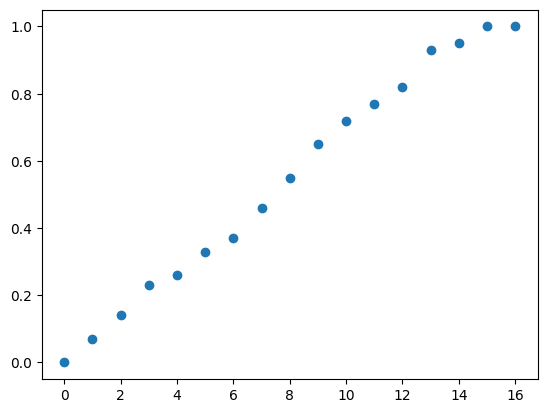

In [397]:
plt.scatter(I, J)

In [383]:
model.summary()

Model: "model_54"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_104 (InputLayer)      [(None, 1, 1536)]            0         []                            
                                                                                                  
 input_103 (InputLayer)      [(None, 15, 1536)]           0         []                            
                                                                                                  
 multi_head_attention_71 (M  (None, 1, 1536)              155211    ['input_104[0][0]',           
 ultiHeadAttention)                                                  'input_103[0][0]']           
                                                                                                  
 layer_normalization_98 (La  (None, 1, 1536)              3072      ['multi_head_attention_

In [399]:
attention_layer = model.get_layer('attention')
weight_names = ['query', 'keys',  'values', 'proj']
for name, out in zip(weight_names,layer.get_weights()):
    print(name, out.shape)

query (1536, 15, 1)
keys (15, 1)
values (1536, 15, 1)
proj (15, 1)


In [409]:
attention = tf.keras.Model(inputs=model.input, 
                                 outputs=model.get_layer("attention").output)

In [410]:
yy = attention.predict([sX, pX])

  1/138 [..............................] - ETA: 3s

/home/hsmhabib/.conda/envs/ytbase/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


138/138 [==============================] - 0s 3ms/step


In [414]:
yy.shape

(4413, 1, 1536)

In [ ]:
from tensorflow.keras.layers import MultiHeadAttention
import tensorflow as tf



suggested_tensor = tf.keras.Input(shape=[15, 1536])
playing_tensor = tf.keras.Input(shape=[1, 1536])
layer = MultiHeadAttention(num_heads=5, key_dim=5)
x = layer(suggested_tensor, playing_tensor)
layer_norm = tf.keras.layers.LayerNormalization()
x = layer_norm(x)

d_model = 1536

seq = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(d_model, activation='relu'),
    tf.keras.layers.Dropout(0.1)
])
add = tf.keras.layers.Add()
x = add([x, seq(x)])
layer_norm = tf.keras.layers.LayerNormalization()
x = layer_norm(x)

x = tf.keras.layers.Flatten()(x)
final = tf.keras.layers.Dense(1536, activation='relu')(x)
final = tf.keras.layers.Dense(1536, activation='relu')(x)
final = tf.keras.layers.Dense(128, activation='relu')(x)
final = tf.keras.layers.Dense(15, activation='softmax')(x)

model = tf.keras.Model(inputs=[suggested_tensor, playing_tensor], outputs=final)
model.compile(loss='cosine_similarity', optimizer='adam', metrics=['cosine_similarity'])

model.summary()